In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [19]:
irradiance_level = [25, 150, 300, 500, 1000, 2000]
synthesis_rate = [1.9, .41, .26, 1, .9, 2]

In [20]:
#Curve needed to be fit
def Monod(x, K_X):
    return x / (K_X + x)

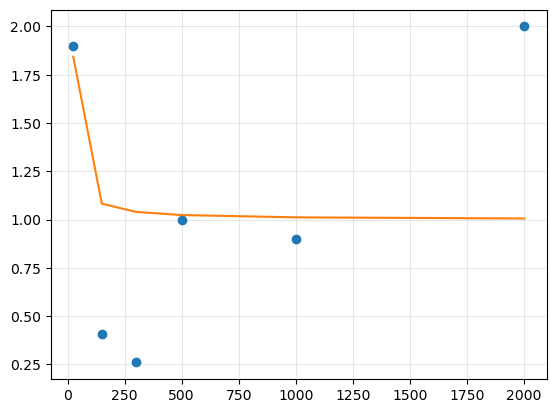

In [21]:
#Monod fit with outlier
param, covar = curve_fit(Monod, irradiance_level, synthesis_rate)

half_sat = param[0]

fit_y = Monod(irradiance_level, half_sat)
plt.plot(irradiance_level, synthesis_rate, 'o')
plt.plot(irradiance_level, fit_y, '-')
plt.grid(alpha=.3)
plt.show()

The half saturation constant for this fit is:  149.32893717458379


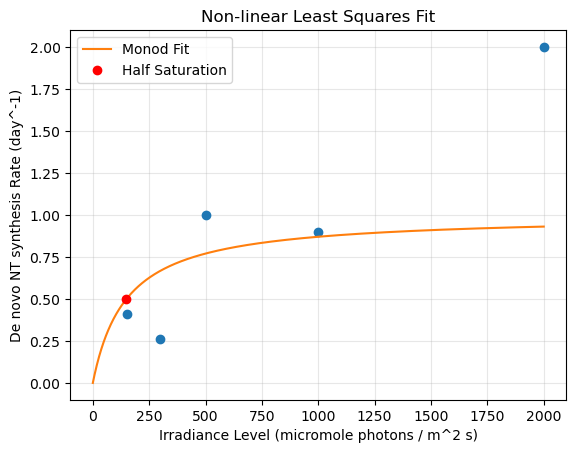

In [38]:
#Monod fit excluding outlier
irradiance_level = [150., 300., 500., 1000., 2000.]
synthesis_rate   = [.41, .26, 1., .9, 2.]

#Optimizing function paramteres to fit data
param, covar = curve_fit(Monod, irradiance_level, synthesis_rate)

#Extracting Half-saturation constant
half_sat = param[0]
print('The half saturation constant for this fit is: ', half_sat)

new_x = np.linspace(0, 2000, 1000)
fit_y = Monod(new_x, half_sat)

plt.plot(irradiance_level, synthesis_rate, 'o')
plt.plot(new_x, fit_y, '-', label="Monod Fit")
plt.plot(149.3289348184329,  Monod(149.3289348184329, half_sat), 'ro', label="Half Saturation")
plt.xlabel("Irradiance Level (micromole photons / m^2 s)")
plt.ylabel("De novo NT synthesis Rate (day^-1)")
plt.title("Non-linear Least Squares Fit")
plt.grid(alpha=.3); plt.legend()
plt.show()